# Aprendizaje Supervisado. Clasificación

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.svm import SVC

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, mean_absolute_error, r2_score

In [43]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

## Importar Dataset

In [5]:
titanic = pd.read_csv("./Datasets/Titanic/train.csv")

## Conocer los datos

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

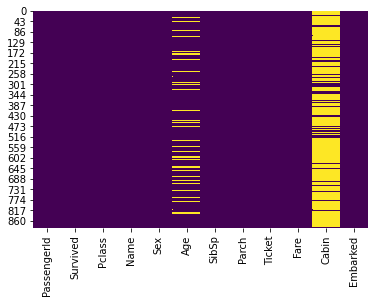

In [10]:
sns.heatmap(titanic.isna(), cbar=False, cmap='viridis')

In [11]:
titanic.shape

(891, 12)

In [12]:
titanic['Age'].isna().sum()/titanic.shape[0]*100

19.865319865319865

In [13]:
titanic['Cabin'].isna().sum()/titanic.shape[0]*100

77.10437710437711

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Tratamiento de los datos

In [15]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
genero = {'female': 0, 'male': 1}
titanic['Sex'] = titanic['Sex'].map(genero)

In [17]:
titanic['Sex'] = titanic['Sex'].astype('int')

In [18]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
embarque = {'S': 1, 'C': 2, 'Q': 3}
titanic['Embarked'] = titanic['Embarked'].map(embarque)

In [20]:
#titanic['Embarked'] = titanic['Embarked'].astype('int')

In [21]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['Pclass']==1]['Age'].mean()
        elif pclass == 2:
            return titanic[titanic['Pclass']==2]['Age'].mean()
        elif pclass == 3:
            return titanic[titanic['Pclass']==3]['Age'].mean()
    else:
        return age

In [22]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

In [23]:
titanic = titanic.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 52.3 KB


In [25]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [26]:
titanic = titanic.dropna(how='any')

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 59.0 KB


## Graficar los datos

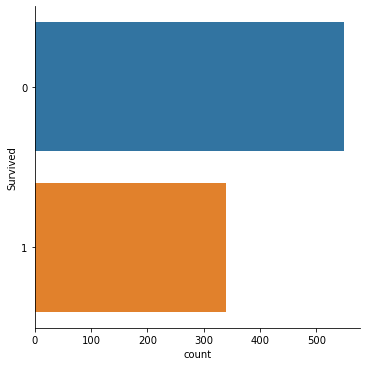

In [28]:
sns.catplot(y='Survived', data=titanic, kind='count')

In [29]:
genero

{'female': 0, 'male': 1}

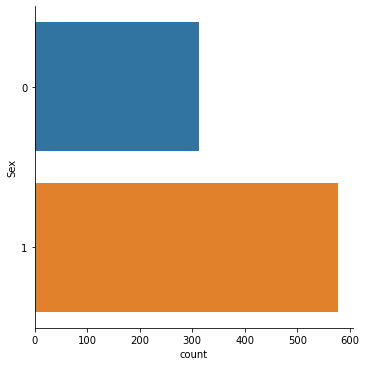

In [30]:
sns.catplot(y='Sex', data=titanic, kind='count')

## Separa la data

In [31]:
X = titanic.drop(columns='Survived')
Y = titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
x_train.shape

(711, 7)

In [33]:
x_test.shape

(178, 7)

In [34]:
y_train.shape

(711,)

In [35]:
y_test.shape

(178,)

## Aplicar modelos de ML

### Regresión Logística

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred = lr.predict(x_test)

In [39]:
print(f'Precisión por regresión Logística: {lr.score(x_train, y_train)*100}%')

Precisión por regresión Logística: 80.59071729957806%


In [40]:
print(f'Error absoluto medio: {mean_absolute_error(y_test, y_pred)}')
print(f'Error medio cuadrado: {mean_squared_error(y_test, y_pred)}')
print(f'Desviación de la raíz cuadrada media: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Error absoluto medio: 0.19662921348314608
Error medio cuadrado: 0.19662921348314608
Desviación de la raíz cuadrada media: 0.4434289272060925


In [41]:
print(f'Score predict train {r2_score(y_train, lr.predict(x_train))}')
print(f'Score predict test {r2_score(y_test, lr.predict(x_test))}')

Score predict train 0.1771385441127138
Score predict test 0.17165270575721325


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

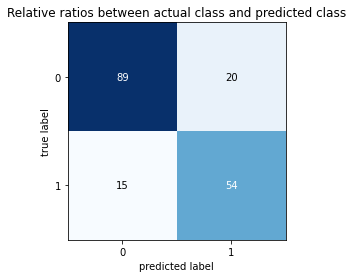

In [44]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

### Árboles de Decisión

In [46]:
dtc = DecisionTreeClassifier()

In [47]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dtc.predict(x_test)

In [53]:
print(f'Precisión por Árbol de Decisión clasificatorio: {dtc.score(x_train, y_train)*100}%')
print(f'Error absoluto medio: {mean_absolute_error(y_test, y_pred)}')
print(f'Error medio cuadrado: {mean_squared_error(y_test, y_pred)}')
print(f'Desviación de la raíz cuadrada media: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Score predict train {r2_score(y_train, dtc.predict(x_train))}')
print(f'Score predict test {r2_score(y_test, dtc.predict(x_test))}')

Precisión por Árbol de Decisión clasificatorio: 98.59353023909986%
Error absoluto medio: 0.21910112359550563
Error medio cuadrado: 0.21910112359550563
Desviación de la raíz cuadrada media: 0.46808238975153255
Score predict train 0.9403723582690372
Score predict test 0.07698444355803769


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.70      0.75      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

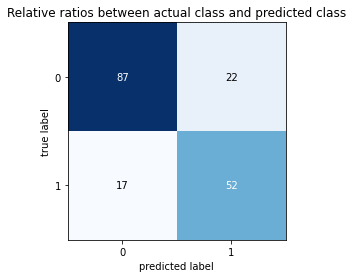

In [52]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

### Support Vector Machine

In [55]:
svm = SVC()

In [56]:
svm.fit(x_train, y_train)

SVC()

In [57]:
y_pred = svm.predict(x_test)

In [58]:
print(f'Precisión por Árbol de Decisión clasificatorio: {svm.score(x_train, y_train)*100}%')
print(f'Error absoluto medio: {mean_absolute_error(y_test, y_pred)}')
print(f'Error medio cuadrado: {mean_squared_error(y_test, y_pred)}')
print(f'Desviación de la raíz cuadrada media: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Score predict train {r2_score(y_train, svm.predict(x_train))}')
print(f'Score predict test {r2_score(y_test, svm.predict(x_test))}')

Precisión por Árbol de Decisión clasificatorio: 67.9324894514768%
Error absoluto medio: 0.3202247191011236
Error medio cuadrado: 0.3202247191011236
Desviación de la raíz cuadrada media: 0.5658840155907601
Score predict train -0.35951023146595107
Score predict test -0.34902273633825276


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       109
           1       0.70      0.30      0.42        69

    accuracy                           0.68       178
   macro avg       0.69      0.61      0.60       178
weighted avg       0.69      0.68      0.64       178



Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

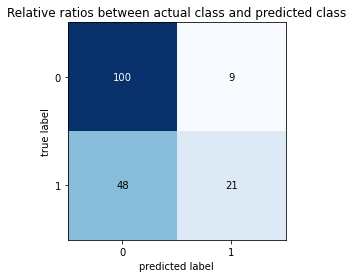

In [60]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

### KNeighbors Classifier

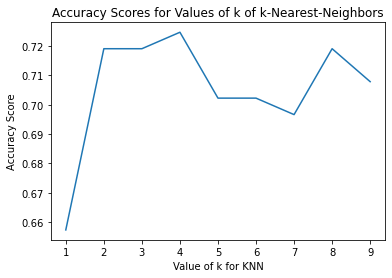

In [64]:
k_range = list(range(1,10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [65]:
knn = KNeighborsClassifier(n_neighbors=4)

In [66]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [67]:
y_pred = knn.predict(x_test)

In [68]:
print(f'Precisión por Árbol de Decisión clasificatorio: {knn.score(x_train, y_train)*100}%')
print(f'Error absoluto medio: {mean_absolute_error(y_test, y_pred)}')
print(f'Error medio cuadrado: {mean_squared_error(y_test, y_pred)}')
print(f'Desviación de la raíz cuadrada media: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Score predict train {r2_score(y_train, knn.predict(x_train))}')
print(f'Score predict test {r2_score(y_test, knn.predict(x_test))}')

Precisión por Árbol de Decisión clasificatorio: 80.45007032348805%
Error absoluto medio: 0.2752808988764045
Error medio cuadrado: 0.2752808988764045
Desviación de la raíz cuadrada media: 0.524672182297103
Score predict train 0.17117577993961752
Score predict test -0.1596862119399014


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       109
           1       0.73      0.46      0.57        69

    accuracy                           0.72       178
   macro avg       0.73      0.68      0.68       178
weighted avg       0.73      0.72      0.71       178



Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

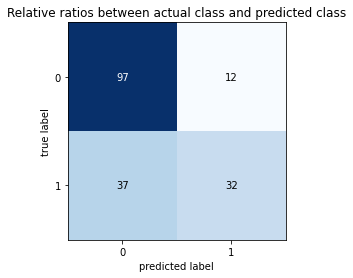

In [70]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

## Comparación de precisión entre los modelos

|       Modelo de ML       | Precisión |
|--------------------------|-----------|
|   Logistic Regression    |   80.59   |
| Decision Tree Classifier |   98.59   |
|  Support Vector Machine  |   67.93   |
|  KNeighbors Classifier   |   80.45   |